## **PROJETO MÓDULO 03**
**FERNANDA LEAL E INGRID MACÁRIO**

Para este projeto, o dataset escolhido foi o ENEM 2022, disponível em: https://www.gov.br/inep/pt-br/assuntos/noticias/enem/divulgados-microdados-do-enem-2022





## Instalação e manipulação do arquivo em zip

In [ ]:
!pip install psycopg2


In [ ]:
!pip install pandas
!pip install pandasql
!pip install sqlalchemy==1.4.46
!pip install sqlalchemy


  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=3643fa3137a981f1247a01a7dd658cac3c9e7e37414d2b50e62f8f8d7fbcdc59
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.1 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.18
    Uninstalling SQLAlchemy-2.0.18:
      Successfully uninstalled SQLAlchemy-2.0.18


In [53]:
import psycopg2
import pandas as pd
import pandasql as ps
import zipfile


In [54]:
dados_zip = "dados_enem.zip"
dados_csv = "dados_enem.csv"

with zipfile.ZipFile(dados_zip, "r") as zip_ref:
    zip_ref.extract(dados_csv)

enem = pd.read_csv(dados_csv, sep=";", encoding="ISO-8859-1")

ps.sqldf("SELECT * FROM enem LIMIT 5")


,faixa_etaria,sexo,cor,municipio,uf,tipo_escola,nota_cn,nota_ch,nota_lc,nota_mat,nota_redacao,idioma
0,14,M,2,Brasília,DF,1,NaN,NaN,NaN,NaN,NaN,0
1,14,M,1,Brasília,DF,1,NaN,NaN,NaN,NaN,NaN,0
2,5,F,2,Presidente Tancredo Neves,BA,1,421.1,546.0,498.8,565.3,760.0,1
3,6,M,3,Cariacica,ES,1,490.7,388.6,357.8,416.0,320.0,1
4,4,M,3,Salinópolis,PA,1,NaN,NaN,NaN,NaN,NaN,0


## **ANÁLISE DESCRITIVA**

# Tipagem das colunas

In [29]:
tipagem_enem = enem.dtypes
tabela_tipagem = pd.DataFrame({"Coluna_Enem": tipagem_enem.index, "Tipo_de_Dado": tipagem_enem.values})

print(tabela_tipagem)

     Coluna_Enem Tipo_de_Dado
0   faixa_etaria        int64
1           sexo       object
2            cor        int64
3      municipio       object
4             uf       object
5    tipo_escola        int64
6        nota_cn      float64
7        nota_ch      float64
8        nota_lc      float64
9       nota_mat      float64
10  nota_redacao      float64
11        idioma        int64


## Contagem dos nulos

In [ ]:
#CONTAGEM DOS NULOS

query = """
SELECT
    COUNT(CASE WHEN faixa_etaria IS NULL THEN 1 END) AS 'nulos_faixa_etaria',
    COUNT(CASE WHEN sexo IS NULL THEN 1 END) AS 'nulos_sexo',
    COUNT(CASE WHEN cor IS NULL THEN 1 END) AS 'nulos_cor',
    COUNT(CASE WHEN municipio IS NULL THEN 1 END) AS 'nulos_municipio',
    COUNT(CASE WHEN uf IS NULL THEN 1 END) AS 'nulos_uf',
    COUNT(CASE WHEN tipo_escola IS NULL THEN 1 END) AS 'nulos_tipo_escola',
    COUNT(CASE WHEN nota_cn IS NULL THEN 1 END) AS 'nulos_nota_cn',
    COUNT(CASE WHEN nota_ch IS NULL THEN 1 END) AS 'nulos_nota_ch',
    COUNT(CASE WHEN nota_lc IS NULL THEN 1 END) AS 'nulos_nota_lc',
    COUNT(CASE WHEN nota_mat IS NULL THEN 1 END) AS 'nulos_nota_mat',
    COUNT(CASE WHEN nota_redacao IS NULL THEN 1 END) AS 'nulos_nota_redacao',
    COUNT(CASE WHEN idioma IS NULL THEN 1 END) AS 'nulos_idioma'

FROM enem
"""
ps.sqldf(query)

,nulos_faixa_etaria,nulos_sexo,nulos_cor,nulos_municipio,nulos_uf,nulos_tipo_escola,nulos_nota_cn,nulos_nota_ch,nulos_nota_lc,nulos_nota_mat,nulos_nota_redacao,nulos_idioma
0,0,0,0,0,0,0,305769,265502,265502,305769,265502,0


# Valores únicos

In [43]:
#DA COLUNA MUNICIPIO
query = """
SELECT DISTINCT
  municipio AS "Municipio_Unico"
FROM enem
"""

ps.sqldf(query)

,Municipio_Unico
0,Brasília
1,Presidente Tancredo Neves
2,Cariacica
3,Salinópolis
4,Rio de Janeiro
...,...
1707,Alto Alegre
1708,Uarini
1709,Japurá
1710,Itamarati


In [66]:
#DA COLUNA UF
query = """
SELECT DISTINCT
  uf AS "UF_Unico"
FROM enem
ORDER BY uf ASC
"""

ps.sqldf(query)

,UF_Unico
0,AC
1,AL
2,AM
3,AP
4,BA
5,CE
6,DF
7,ES
8,GO
9,MA


## Ordendando os municípios por ordem alfabética e a faixa etária em ordem crescente.

In [ ]:
query = """
SELECT
    municipio,
    faixa_etaria

FROM enem

ORDER BY "municipio" ASC, "faixa_etaria" ASC
LIMIT 5
"""

ps.sqldf(query)

,municipio,faixa_etaria
0,Abaetetuba,1
1,Abaetetuba,1
2,Abaetetuba,1
3,Abaetetuba,1
4,Abaetetuba,1


# **PERGUNTAS**

#Quantos candidatos optaram pelo idoma inglês no ENEM 2022? E Espanhol?





In [ ]:
query = """
SELECT
    SUM(CASE WHEN idioma = 0 THEN 1 ELSE 0 END) AS "Inglês",
    SUM(CASE WHEN idioma = 1 THEN 1 ELSE 0 END) AS "Espanhol"

FROM enem
"""

ps.sqldf(query)


,Inglês,Espanhol
0,532378,516197


# Qual foi a % de cada idioma escolhido pelos candidatos no ENEM 2022?



In [ ]:
query = """
SELECT
    ROUND(100.0 * SUM(CASE WHEN idioma = 0 THEN 1 ELSE 0 END) / COUNT(*), 2) AS "Porcentagem_Inglês",
    ROUND(100.0 * SUM(CASE WHEN idioma = 1 THEN 1 ELSE 0 END) / COUNT(*), 2) AS "Porcentagem_Espanhol"

FROM enem
"""
ps.sqldf(query)

,Porcentagem_Inglês,Porcentagem_Espanhol
0,50.77,49.23


## No ENEM 2022, qual foi a quantidade de canditados de cada sexo?






In [ ]:
query = """
SELECT
    SUM(CASE WHEN sexo = 'F' THEN 1 ELSE 0 END) AS "Mulheres",
    SUM(CASE WHEN sexo = 'M' THEN 1 ELSE 0 END) AS "Homens"

FROM enem
"""

ps.sqldf(query)

,Mulheres,Homens
0,702410,346165


## Qual a média geral em Matemática? Qual a médias das mulheres em Matemática? Qual a média dos homens em Matemática?

In [ ]:
#MÉDIA GERAL EM MATEMÁTICA

query = """
SELECT
    ROUND(AVG(nota_mat),2) AS "Média_Matemática"
FROM enem
"""

ps.sqldf(query)



#MÉDIA DOS HOMENS EM MATEMÁTICA


,Média_Matemática
0,531.93


In [ ]:
#MÉDIA DAS MULHERES EM MATEMÁTICA

query = """
SELECT
    ROUND(AVG(nota_mat), 2) AS "Média_Matemática_Mulheres"

FROM enem
WHERE sexo = 'F'

"""

ps.sqldf(query)

,Média_Matemática_Mulheres
0,519.93


In [ ]:
#MÉDIA DOS HOMENS EM MATEMÁTICA

query = """
SELECT
    ROUND(AVG(nota_mat), 2) AS "Média_Matemática_Homens"

FROM enem
WHERE sexo = 'M'

"""

ps.sqldf(query)

,Média_Matemática_Homens
0,556.41


# Na disciplina de ciências da natureza, qual foi a maior nota entre as mulheres? E entre os homens?

In [ ]:
query = """
SELECT
    ROUND(MAX(nota_cn),2) AS "Maior_Nota_Mulheres_CN"

FROM enem
WHERE sexo = 'F'

"""

ps.sqldf(query)

,Maior_Nota_Mulheres_CN
0,868.7


In [ ]:
query = """
SELECT
    ROUND(MAX(nota_cn),2) AS "Maior_Nota_Homens_CN"

FROM enem
WHERE sexo = 'M'

"""

ps.sqldf(query)

,Maior_Nota_Homens_CN
0,875.3


###Qual foi  a faixa etária predominante entre os candidatos do ENEM 2022?
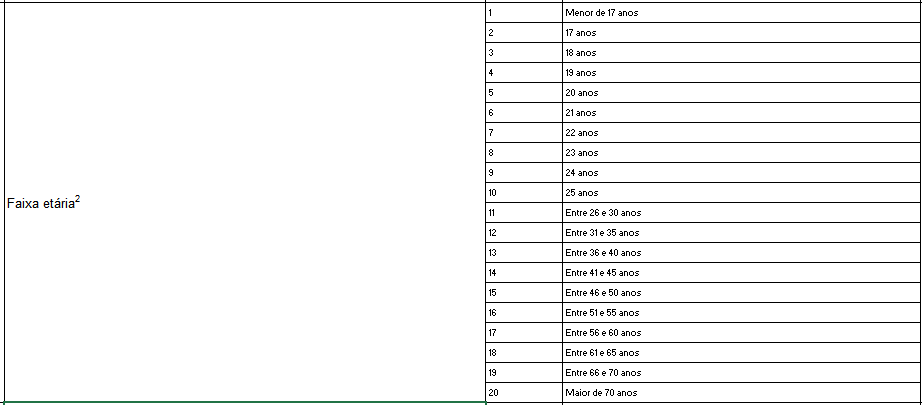

In [ ]:
query = """
SELECT
    faixa_etaria,
    COUNT (*) AS "Quant_Repetições"

FROM enem
GROUP BY faixa_etaria
ORDER BY COUNT (*) DESC
"""
ps.sqldf(query)

,faixa_etaria,Quant_Repetições
0,3,264659
1,2,203548
2,4,138727
3,5,84186
4,11,57107
5,6,55666
6,1,53642
7,7,39492
8,12,30133
9,8,29701


# Na coluna de Tipo_Escola e Cor, substituir os valores pelas suas respectivas descrições, de acordo com a legenda indicada a seguir.

# Qual a cor/raça predominante em cada tipo de escola?

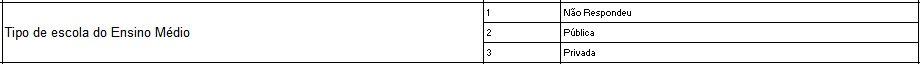

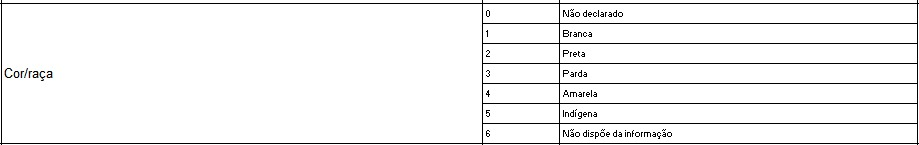

In [ ]:
query = """
SELECT
    CASE tipo_escola
        WHEN 1 THEN 'Não respondeu'
        WHEN 2 THEN 'Pública'
        WHEN 3 THEN 'Privada'
        ELSE tipo_escola
    END AS "Tipo_Escola",
    CASE cor
        WHEN 0 THEN 'Não declarado'
        WHEN 1 THEN 'Branca'
        WHEN 2 THEN 'Preta'
        WHEN 3 THEN 'Parda'
        WHEN 4 THEN 'Amarela'
        WHEN 5 THEN 'Indígena'
        WHEN 6 THEN 'Não dispõe da informação'
    END AS "Cor",
    COUNT(*) AS "Quantidade"

FROM enem
GROUP BY tipo_escola, cor
ORDER BY COUNT(*) DESC

"""

ps.sqldf(query)

,Tipo_Escola,Cor,Quantidade
0,Não respondeu,Parda,290834
1,Não respondeu,Branca,222340
2,Pública,Parda,181918
3,Pública,Branca,131589
4,Não respondeu,Preta,86858
5,Pública,Preta,46424
6,Privada,Branca,29812
7,Não respondeu,Amarela,12297
8,Privada,Parda,10319
9,Não respondeu,Não declarado,10302


# Quais foram os estados dos candidatos que obtiveram as 5 maiores notas em Ciências Humanas no Enem 2022?

In [ ]:
#TOP5 DE ESTADOS COM MAIOR NOTA
query = """
SELECT
  uf, nota_ch AS "TOP5_Ciências_Humanas"
FROM enem
ORDER BY nota_ch DESC
LIMIT 5
"""
ps.sqldf(query)

,uf,TOP5_Ciências_Humanas
0,GO,839.2
1,PB,829.1
2,SP,827.2
3,SP,827.2
4,SP,827.2


# Quantos candidatos não foram realizar a prova de redação no ENEM 2022 no estado da Bahia?

In [37]:
query = """
SELECT
  uf,
  COUNT(*) AS "Quantidade"
FROM enem
WHERE nota_redacao IS NULL AND uf = 'BA'
GROUP BY uf='BA'

"""
ps.sqldf(query)



,uf,Quantidade
0,BA,22321


# Qual foi a média dos candidatos por tipo de escola na prova de Linguagens no Enem 2022?
Obs: Não considerar os candidatos que não responderam o tipo de escola.

In [ ]:
query = """
SELECT
  CASE tipo_escola
        WHEN 2 THEN 'Pública'
        WHEN 3 THEN 'Privada'
        ELSE tipo_escola
  END AS "Tipo_Escola",
  ROUND(AVG(nota_lc), 2) AS "Media_Linguagens"
FROM enem
WHERE tipo_escola IS NOT ('1')
GROUP BY tipo_escola
"""
ps.sqldf(query)

,Tipo_Escola,Media_Linguagens
0,Pública,499.22
1,Privada,565.76


# **SALVANDO EM HTML**

In [ ]:

from google.colab import files
f = files.upload()


import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])


files.download(file0[:-5]+"html")
